In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [22]:
directory = 'C:/Users/leand/Documents/LEANDRO/UBA/CEIA/III/CV/CV_TPS/TP1/Material_TPs/TP1/white_patch/'
img_list = []

# Lista todos los archivos en el directorio
files = os.listdir(directory)

for file in files:
    img = cv.imread(directory + file)
    img_list.append(img)

# Función Algoritmo de white
- Al interior de la función se aplica la siguiente formula: 
$$(R,G,B) = \left(\frac{255}{R_{max}} R, \frac{255}{G_{max}} G, \frac{255}{B_{max}} B \right)$$

## observaciones de implementación
- se convierte de BGR a RGB, y cada valor R G B se convierte a float
- se almacenó en una lista cada imagen del directorio con el fin que la función recorra cada imagen, aplique el algoritmo y vaya ploteando uno por uno

In [23]:
def white_patch(images):
    # Recorrer imagen por imagen y convertirla a formato RGB
    for img in images:
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R, G, B = np.float64(cv.split(img_rgb))

        # se deben convertir RGB a flotantes o el resultado será una división de enteros
        R_max = np.max(R)
        G_max = np.max(G)
        B_max = np.max(B)

        # Aplicar el algoritmo de white patch
        r = np.clip((255/R_max) * R, 0, 255).astype(np.uint8)
        g = np.clip((255/G_max) * G, 0, 255).astype(np.uint8)
        b = np.clip((255/B_max) * B, 0, 255).astype(np.uint8)

        
        wp_img =cv.merge((r, g, b))

        
        # Mostrar imagen original y resultante
        if np.array_equal(wp_img, img_rgb):
            print("Imagen original y resultante no sufren cambios")
            
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(img_rgb)
        ax[0].set_title('Original')
        ax[1].imshow(wp_img)
        ax[1].set_title('Resultante del algoritmo de White Patch')
        plt.show()

In [24]:
files

['test_blue.png',
 'test_green.png',
 'test_red.png',
 'wp_blue.jpg',
 'wp_green.png',
 'wp_green2.jpg',
 'wp_red.png',
 'wp_red2.jpg']

# Posibles fallas observadas
- Si un solo canal tiene un valor máximo de 255 y los otros no, aquel canal tendrá más peso sobre la imagen. e.g la imagen wp_green.png presenta un realce de blancos pero el canal green sigue siendo predominante
- Si los tres canales tienen como valor máximo 255 , la resultante no va a mostrar ningún alguno. e.g imagen wp_blue.jpg (se colocó un print en caso de llegar a ser igual)
- Se observó la particularidad que las imágenes formato .jpg fueron las que presentaron cambios un poco menos percetibles, por lo cual me queda la duda si por su formato con información menos precisa que el .png pueda ser la causal.

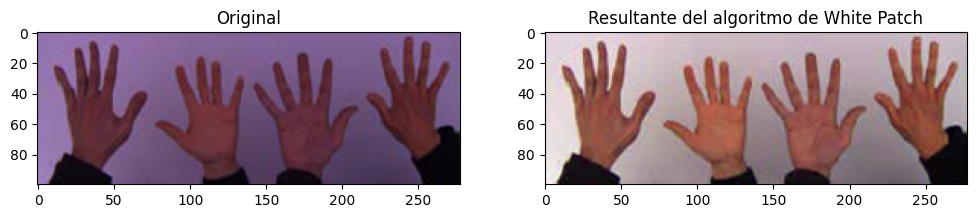

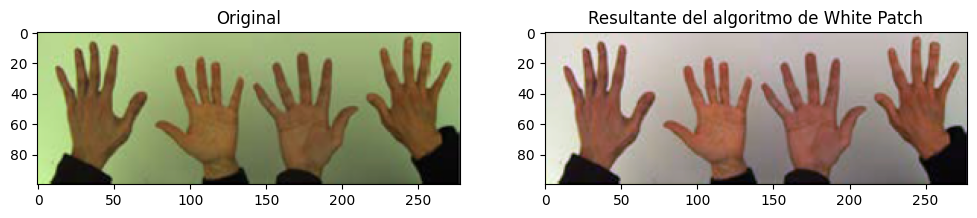

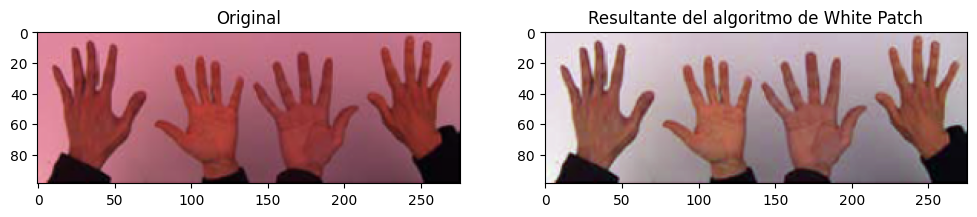

Imagen original y resultante no sufren cambios


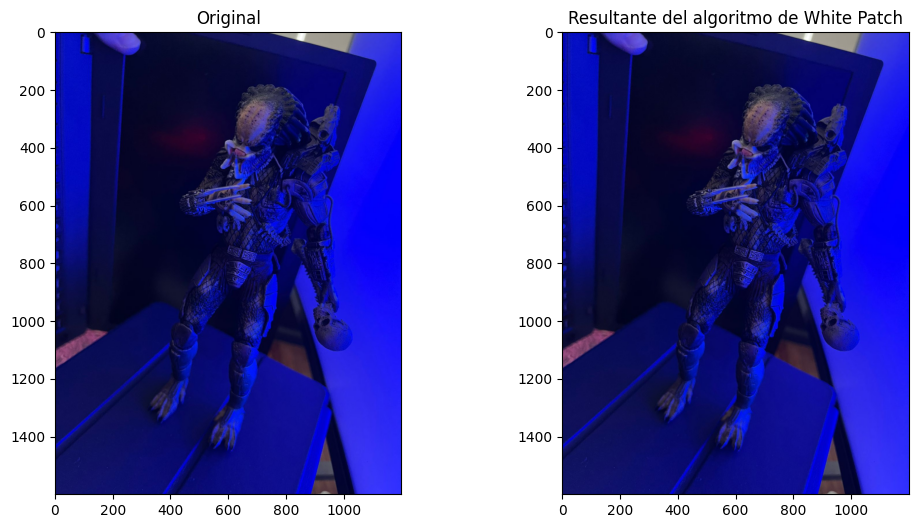

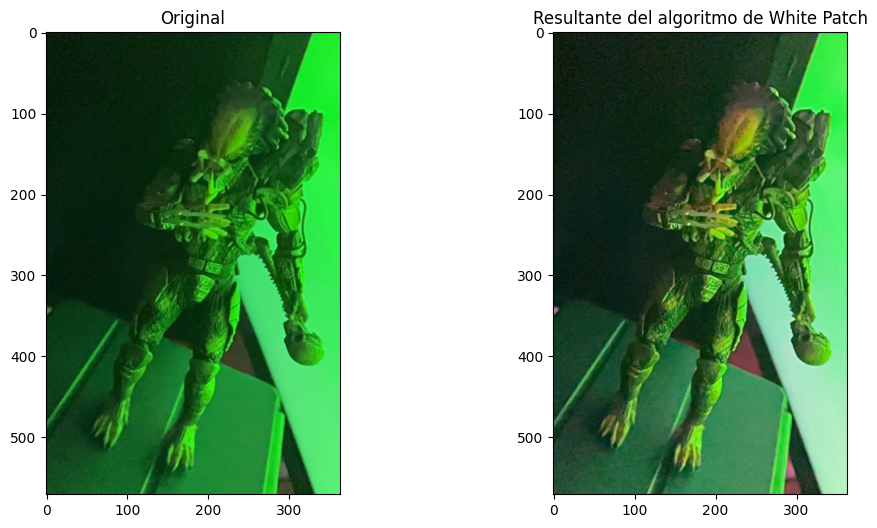

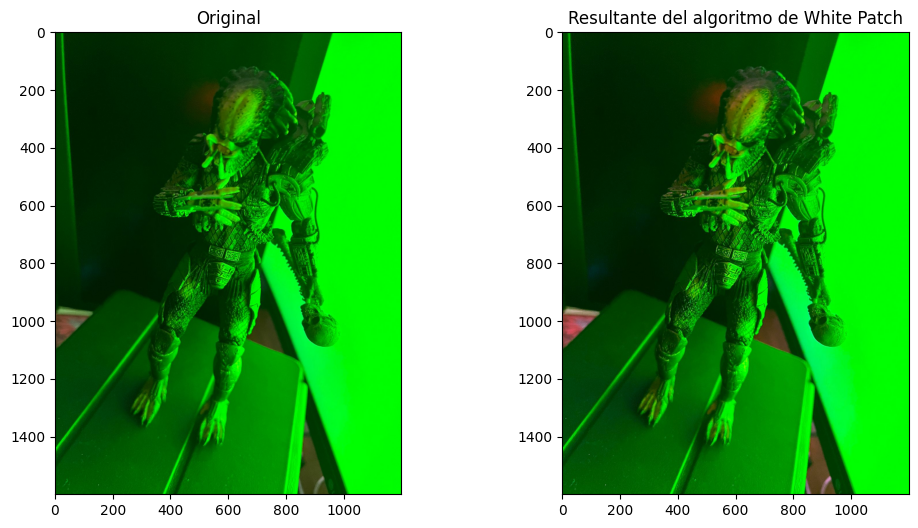

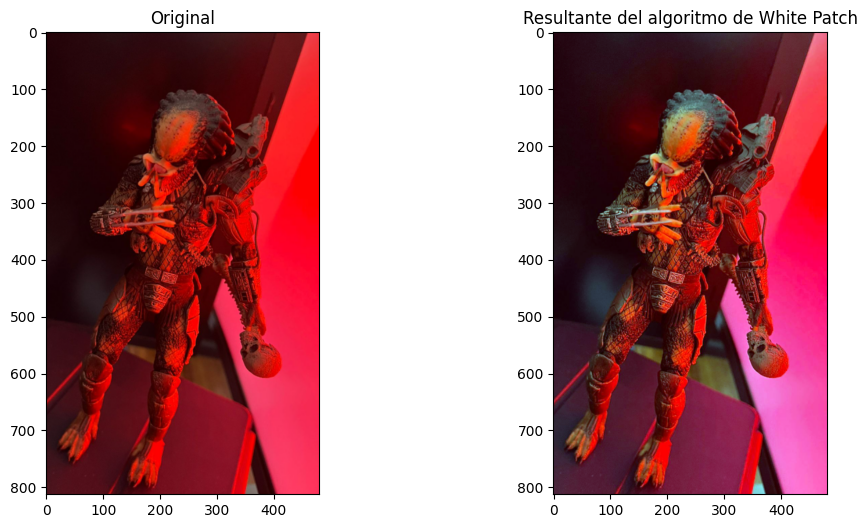

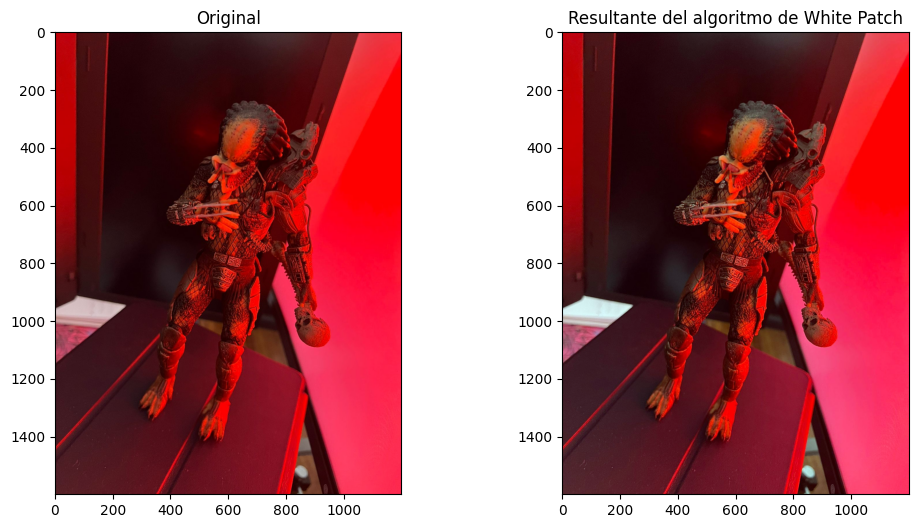

In [25]:
white_patch(img_list)